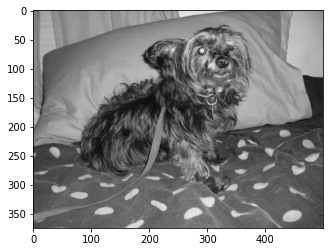

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "PetImages"

CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!


In [11]:
img_array

array([[117, 117, 119, ..., 133, 132, 132],
       [118, 117, 119, ..., 135, 134, 134],
       [119, 118, 120, ..., 137, 136, 136],
       ...,
       [ 79,  74,  73, ...,  80,  76,  73],
       [ 78,  72,  69, ...,  72,  73,  74],
       [ 74,  71,  70, ...,  75,  73,  71]], dtype=uint8)

In [12]:
img_array.shape

(375, 500)

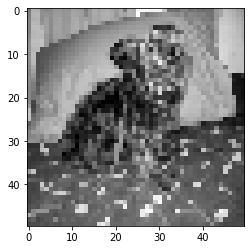

In [13]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [14]:
new_array

array([[115, 160, 159, ..., 157, 148, 139],
       [121, 164, 166, ..., 163, 153, 146],
       [124, 161, 164, ..., 168, 161, 151],
       ...,
       [155, 128,  88, ...,  81,  69,  68],
       [ 87,  95,  72, ...,  77,  74,  73],
       [ 75,  78,  79, ...,  75,  78,  75]], dtype=uint8)

In [15]:
new_array.shape

(50, 50)

In [16]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|█████████████████████████████████████████████████████████████████████████| 12501/12501 [00:18<00:00, 689.15it/s]

24946


In [19]:
training_data

[[array([[115, 160, 159, ..., 157, 148, 139],
         [121, 164, 166, ..., 163, 153, 146],
         [124, 161, 164, ..., 168, 161, 151],
         ...,
         [155, 128,  88, ...,  81,  69,  68],
         [ 87,  95,  72, ...,  77,  74,  73],
         [ 75,  78,  79, ...,  75,  78,  75]], dtype=uint8),
  0],
 [array([[116, 125,  75, ...,  88,  81,  61],
         [ 83, 126,  82, ...,  93,  69,  58],
         [106, 117,  99, ...,  27,  88,  68],
         ...,
         [245, 243, 249, ..., 231, 224, 216],
         [249, 246, 249, ..., 238, 227, 227],
         [240, 239, 243, ..., 243, 234, 234]], dtype=uint8),
  0],
 [array([[112, 102, 116, ..., 123, 122, 123],
         [ 88, 110, 120, ..., 123, 121, 119],
         [138, 140, 126, ..., 124, 124, 125],
         ...,
         [203, 208, 206, ...,  98,  96,  94],
         [201, 199, 197, ...,  92,  95,  96],
         [201, 199, 198, ...,  93,  96,  95]], dtype=uint8),
  0],
 [array([[188, 184, 181, ...,  35,  32,  38],
         [181, 184, 1

In [23]:
training_data[1]

[array([[116, 125,  75, ...,  88,  81,  61],
        [ 83, 126,  82, ...,  93,  69,  58],
        [106, 117,  99, ...,  27,  88,  68],
        ...,
        [245, 243, 249, ..., 231, 224, 216],
        [249, 246, 249, ..., 238, 227, 227],
        [240, 239, 243, ..., 243, 234, 234]], dtype=uint8),
 0]

In [24]:
training_data[0][0]

array([[115, 160, 159, ..., 157, 148, 139],
       [121, 164, 166, ..., 163, 153, 146],
       [124, 161, 164, ..., 168, 161, 151],
       ...,
       [155, 128,  88, ...,  81,  69,  68],
       [ 87,  95,  72, ...,  77,  74,  73],
       [ 75,  78,  79, ...,  75,  78,  75]], dtype=uint8)

In [25]:
training_data[0][0]

array([[115, 160, 159, ..., 157, 148, 139],
       [121, 164, 166, ..., 163, 153, 146],
       [124, 161, 164, ..., 168, 161, 151],
       ...,
       [155, 128,  88, ...,  81,  69,  68],
       [ 87,  95,  72, ...,  77,  74,  73],
       [ 75,  78,  79, ...,  75,  78,  75]], dtype=uint8)

In [26]:
import random
random.shuffle(training_data)

In [17]:
for sample in training_data[:10]:
    print(sample[1])

1
0
1
1
1
0
1
0
0
0


In [18]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

In [19]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
#We can always load it in to our current script, or a totally new one by doing:

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)